# Code to generate the synthetic data for Single PHUs.

In [2]:


import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

from scipy.optimize import minimize

##### CHANGE HERE #############
### Use the time up to which you need to generate synthetic data for
dt = 0.1
tstart = 0
tlim = 272
t = np.arange(tstart, tlim, 1)

tmoh = np.arange(tstart, tlim, dt)

ndiv = 1/dt


##### CHANGE HERE #############

###### If you have your own data, load it here #######
### Currently loaded infection data from MOH, for April 2020 to March 2021

PHU_path = './../../PHU_Data/'
Data = np.zeros([365,4])

files = os.listdir(PHU_path)

target_file1 = f'{PHU_path}/30-Toronto.csv'
target_file2 = f'{PHU_path}/34-York.csv'
target_file3 = f'{PHU_path}/04-Durham.csv'
target_file4 = f'{PHU_path}/22-PeelRegion.csv'

Data[:,0] = np.genfromtxt(target_file1, delimiter=',')
Data[:,1] = np.genfromtxt(target_file2, delimiter=',')
Data[:,2] = np.genfromtxt(target_file3, delimiter=',')
Data[:,3] = np.genfromtxt(target_file4, delimiter=',')


population_by_phu = np.genfromtxt(f'{PHU_path}/population_by_phu.csv', delimiter=',')


N_city = 1
# Preallocate compartments
S = np.zeros((len(tmoh),N_city))
E = np.zeros((len(tmoh),N_city))
I = np.zeros((len(tmoh),N_city))
R = np.zeros((len(tmoh),N_city))
D = np.zeros((len(tmoh),N_city))
N = np.zeros((len(tmoh),N_city))


I_model = np.zeros((len(t),N_city))
I_synthetic = np.zeros((len(t),N_city))

##### CHANGE HERE #############
## Observed data
I_synthetic[:,0] =  Data[tstart:tlim,2]
##############################

L_Force = np.zeros((len(tmoh),N_city))

##### CHANGE HERE #############
total = population_by_phu[3,1]
##### CHANGE HERE #############

 
##### CHANGE HERE #############
E[0,0] = Data[0,2]
I[0,0] = Data[0,2]
##############################
R[0,0] = 0
D[0,0] = 0
N[0,0] = total
S[0,0] = N[0,0] - E[0,0] - I[0,0] - R[0,0] - D[0,0]
I_model[0,0] = I[0,0]


# Model parameters - Taken from Southern Ontario - COVID MBE paper
gamma_e = 1/15
gamma_i = 1/5
gamma_r = 1/11
gamma_d = 1/750

beta_e = np.zeros((len(tmoh),N_city)) 
beta_i = np.zeros((len(tmoh),N_city))

beta_calibrated = np.zeros((len(tmoh),N_city))


print("initial infected",I[0,0])

print("total population",total)


#### PEEL - 234 , 1451022

#### Toronto - 430 , 2794356

### York - 212, 1173334

### Durham - 94   - 696992


mpl.rcParams.update({'font.size':14})





initial infected 94.0
total population 696992.0


# Manually Calibrated Beta values for each PHU

In [3]:

##### Use the model parameters of your model for generating Synthetic data from



# original    
# a0 =   0.15
# a1 =  -0.1
# t1 =  20
# a2 =   0.05
# t2 =  35
# a3 =   -0.07
# t3 = 60
# a4 =  0.035
# t4 = 80
# a5 =  0.08
# t5 = 140
# a6 =  -0.065
# t6 = 180
# a7 =  0.025
# t7 = 190
# a8 =  -0.015
# t8 = 230  

# beta_i[:,0] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh)))  + a6/(1 + np.exp((t6-tmoh))) + a7/(1 + np.exp((t7-tmoh))) + a8/(1 + np.exp((t8-tmoh)))
# beta_e[:,0] = beta_i[:,0]

################### Durham ##########################################################

# Original

a0 =   0.14
a1 =  -0.115
t1 =  20
a2 =   0.06
t2 =  35
a3 =   -0.05
t3 = 65
a4 =  0.035
t4 = 90
a5 =  0.06
t5 = 140
a6 =  -0.075
t6 = 180
a7 =  0.06
t7 = 190
a8 =  -0.025
t8 = 250


beta_i[:,0] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh)))  + a6/(1 + np.exp((t6-tmoh))) + a7/(1 + np.exp((t7-tmoh))) + a8/(1 + np.exp((t8-tmoh)))
beta_e[:,0] = beta_i[:,0]



################### York ##########################################################

# Original
# a0 =   0.12
# a1 =  -0.1
# t1 =  20
# a2 =   0.08
# t2 =  35
# a3 =   -0.04
# t3 = 50
# a4 =  0.07
# t4 = 130
# a5 = -0.04
# t5 = 200



# beta_i[:,0] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh))) 
# beta_e[:,0] = beta_i[:,0]


################### Peel ##########################################################

# original
# a0 =   0.15
# a1 =  -0.1
# t1 =  20
# a2 =   0.05
# t2 =  35
# a3 =   -0.07
# t3 = 60
# a4 =  0.035
# t4 = 80
# a5 =  0.08
# t5 = 140
# a6 =  -0.09
# t6 = 180
# a7 =  0.065
# t7 = 190
# a8 =  -0.035
# t8 = 235

# beta_i[:,0] = a0  + a1/(1 + np.exp((t1-tmoh))) +  a2/(1 + np.exp((t2-tmoh))) + a3/(1 + np.exp((t3-tmoh))) + a4/(1 + np.exp((t4-tmoh))) + a5/(1 + np.exp((t5-tmoh)))  + a6/(1 + np.exp((t6-tmoh))) + a7/(1 + np.exp((t7-tmoh))) + a8/(1 + np.exp((t8-tmoh)))
# beta_e[:,0] = beta_i[:,0]


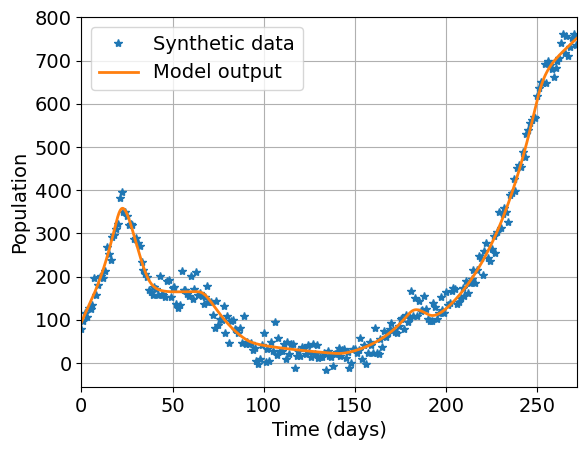

In [9]:



### CHANGE HERE #######

### Fixed values of noise strength

mu = 0 # mean 

# Toronto
# sigma = 75 # standard deviation

# Durham
sigma = 20 # standard deviation

# # York
# sigma = 20 # standard deviation

# # Peel
# sigma = 40 # standard deviation

# Set seed for reproducibility
np.random.seed(31)

e_data = np.random.normal(mu, sigma,len(t))

###########################################
 

FoI = np.zeros((len(tmoh),1))
    
for kk in range(1,len(tmoh)):

  FoI[kk,0] = beta_e[kk-1,0] * (E[kk-1,0] + I[kk-1,0]) / N[kk-1,0]

  S[kk,0] = S[kk-1,0] + dt*(- FoI[kk,0] * S[kk-1,0])
  E[kk,0] = E[kk-1,0] + dt*(FoI[kk,0]*S[kk-1,0] - (gamma_i + gamma_e)*E[kk-1,0])
  
  I[kk,0] = I[kk-1,0] + dt*(gamma_i*E[kk-1,0] - (gamma_r + gamma_d)*I[kk-1,0])
  R[kk,0] = R[kk-1,0] + dt*(gamma_e*E[kk-1,0] + gamma_r*I[kk-1,0])
  D[kk,0] = D[kk-1,0] + dt*(gamma_d*I[kk-1,0])
  N[kk,0] = S[kk,0] +  E[kk,0] + I[kk,0] + R[kk,0]

  if( kk%ndiv == 0):
      idxmoh = int(kk/ndiv)
      I_model[idxmoh,0] = I[kk,0]
      I_synthetic[idxmoh,0] = I[kk,0]




# print("I model", I_model)

# print("added noise", e_data)


# print("i synthetic before noise", I_synthetic)

I_synthetic[:,0] = I_synthetic[:,0] + e_data


# print("i synthetic after noise", I_synthetic)


### Save the synthetic data in CSV file for future use
np.savetxt('./durham_synthetic_data.csv', I_synthetic, delimiter=",")


path = '/Users/sudhipv/documents/coupledode/codes/Inference/MLE/singlePHU/synthetic/figs'

filepath =  os.path.join(path,'peel_synthetic_data.pdf')



# plt.plot(t, Data[tstart:tlim,3], 'o', label='MOH : Peel') # Original MOH data
plt.plot(t, I_synthetic, '*', markersize=6, label='Synthetic data')
plt.plot(tmoh, I[:,0], '-',linewidth=2, label='Model output')
plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.xlim([0,tlim])
plt.ylabel('Population')
plt.grid()
plt.savefig('./figs/synthetic_data.pdf')
plt.show()
